In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('../data/essays.csv', encoding='latin1')

In [4]:
df.head(n=2)

,#AUTHID,TEXT,cEXT,cNEU,cAGR,cCON,cOPN
0,1997_504851.txt,"Well, right now I just woke up from a mid-day ...",n,y,y,n,y
1,1997_605191.txt,"Well, here we go with the stream of consciousn...",n,n,y,n,n


In [5]:
# remove rows with missing values
df = df.dropna()

In [6]:
#  remove rows with empty strings
df = df[df['TEXT'].str.strip().astype(bool)]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2468 entries, 0 to 2467
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   #AUTHID  2468 non-null   object
 1   TEXT     2468 non-null   object
 2   cEXT     2468 non-null   object
 3   cNEU     2468 non-null   object
 4   cAGR     2468 non-null   object
 5   cCON     2468 non-null   object
 6   cOPN     2468 non-null   object
dtypes: object(7)
memory usage: 135.1+ KB


In [8]:
# change y and n to 1 for y and 0 for n in the cEXT , cNEU , cAGR , cCON , cOPN columns
df['cEXT'] = df['cEXT'].apply(lambda x: 1 if x == 'y' else 0)
df['cNEU'] = df['cNEU'].apply(lambda x: 1 if x == 'y' else 0)
df['cAGR'] = df['cAGR'].apply(lambda x: 1 if x == 'y' else 0)
df['cCON'] = df['cCON'].apply(lambda x: 1 if x == 'y' else 0)
df['cOPN'] = df['cOPN'].apply(lambda x: 1 if x == 'y' else 0)

In [9]:
df.head(n=2)

,#AUTHID,TEXT,cEXT,cNEU,cAGR,cCON,cOPN
0,1997_504851.txt,"Well, right now I just woke up from a mid-day ...",0,1,1,0,1
1,1997_605191.txt,"Well, here we go with the stream of consciousn...",0,0,1,0,0


In [10]:
df=df.drop(['#AUTHID'], axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2468 entries, 0 to 2467
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TEXT    2468 non-null   object
 1   cEXT    2468 non-null   int64 
 2   cNEU    2468 non-null   int64 
 3   cAGR    2468 non-null   int64 
 4   cCON    2468 non-null   int64 
 5   cOPN    2468 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 115.8+ KB


In [12]:
df.to_csv('../data/essays_cleaned.csv', index=False)

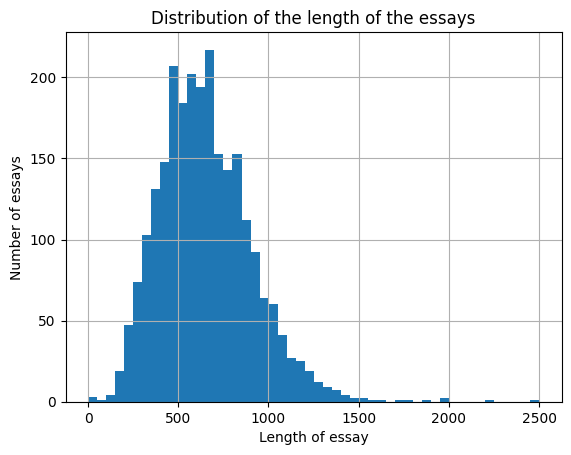

In [13]:

# measure the length of each and plot the distribution
df['TEXT'].str.split().apply(len).hist(bins=50)
plt.title('Distribution of the length of the essays')
plt.xlabel('Length of essay')
plt.ylabel('Number of essays')
plt.show()


In [14]:
# clean the text
# remove urls, symbols, and emojis
import re
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # remove urls
    text = re.sub(r'[^\w\s]', '', text)  # remove symbols
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # remove emojis
    return text

df['TEXT'] = df['TEXT'].apply(clean_text)

In [15]:
# expand contractions
import contractions
def expand_contractions(text):
    return contractions.fix(text)

df['TEXT'] = df['TEXT'].apply(expand_contractions)

In [16]:
# save df to csv
df.to_csv('../data/essays_cleaned.csv', index=False)

In [17]:
# check the values of each column other than TEXT
for column in df.columns[1:]:
    print(df[column].value_counts())
    

cEXT
1    1277
0    1191
Name: count, dtype: int64
cNEU
0    1235
1    1233
Name: count, dtype: int64
cAGR
1    1310
0    1158
Name: count, dtype: int64
cCON
1    1254
0    1214
Name: count, dtype: int64
cOPN
1    1272
0    1196
Name: count, dtype: int64


In [18]:
# use nltk library to remove stopwords, affixes
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [t for t in tokens if t not in stop_words]
    return ' '.join(tokens)

df['TEXT'] = df['TEXT'].apply(clean_text)
df.head(n=5)["TEXT"]

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/omarahmed/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    well right woke midday nap sort weird ever sin...
1    well go stream consciousness essay used things...
2    open keyboard buttons push thing finally worke...
3    believe really happening pulse racing like mad...
4    well go good old stream consciousness assignme...
Name: TEXT, dtype: object

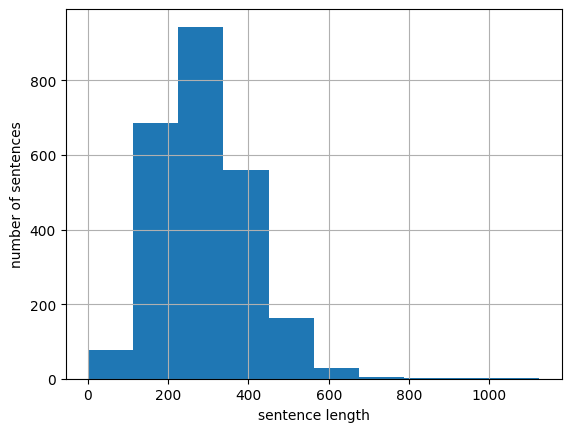

count    2468.000000
mean     1852.992301
std       722.961900
min         6.000000
25%      1357.750000
50%      1778.500000
75%      2294.000000
max      6931.000000
Name: TEXT, dtype: float64

In [21]:
# check the sentence length distribution again
df['TEXT'].str.split().apply(len).hist()
plt.xlabel('sentence length')
plt.ylabel('number of sentences')
plt.show()

# should we remove the outliers?
df['TEXT'].str.len().describe()

In [20]:
#  save new cleaned data
df.to_csv('../data/essays_cleaned_nltk.csv', index=False)